In [1]:
import torch
import numpy as np
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference.base import prepare_for_sbi, simulate_for_sbi
from sbi.inference.snpe.snpe_c import SNPE_C as SNPE
from sbi.inference.snle.snle_a import SNLE_A as SNLE
from sbi.inference.snre.snre_b import SNRE_B as SNRE
from sbi.inference.abc.smcabc import SMCABC
from sbi.utils.get_nn_models import posterior_nn
from sbi.utils import BoxUniform
from sbi.utils import process_prior

import utils as u

import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

import time

import matplotlib
import matplotlib.pyplot as plt
from utils import update_plot_style
update_plot_style()

/opt/miniconda3/envs/casbi/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Estimating cost of Gamma simulator

$c(\theta) = \alpha \theta + \beta$

In [2]:
N = 10
n_rep = 50

theta = torch.linspace(100,1000, N)

elapsed_time = torch.zeros(N)

for i in range(N):
    
    st = time.time()
    
    for j in range(n_rep):
        y = u.gamma_sampler(theta[i])
        
    et = time.time()
    elapsed_time[i] = (et - st)/n_rep
    
alpha = (elapsed_time[N-1] - elapsed_time[0]) / (theta[N-1] - theta[0]) 
beta = -alpha * theta[0] + elapsed_time[0]

/Users/bhartia1/Library/CloudStorage/OneDrive-AaltoUniversity/Software/cost-aware LFI/utils.py:9: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  i_theta = theta // torch.ones(1)
/Users/bhartia1/Library/CloudStorage/OneDrive-AaltoUniversity/Software/cost-aware LFI/utils.py:17: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  i_theta, d_the

## Prior

In [3]:
# Set up prior
num_dim = 1
prior_start = 100
prior_end = 1000

prior = utils.BoxUniform(low=prior_start * torch.ones(num_dim), high=prior_end * torch.ones(num_dim))
simulator, prior = prepare_for_sbi(u.gamma_sampler, prior)

# 1.1 Cost of standard SBI vs number of simulated samples

In [4]:
num_sim = np.array([1000, 5000, 10000, 15000, 20000])
num_repeats = 25
cost_standard_sbi_gamma = np.zeros(shape = (num_repeats, num_sim.size))

for i in range(num_sim.size):
    for j in range(num_repeats):
        
        st = time.time()
        theta, x = simulate_for_sbi(simulator, prior, num_simulations=num_sim[i])
        et = time.time()
        cost_standard_sbi_gamma[j,i] = et-st
        
np.save("cost_standard_sbi_gamma", cost_standard_sbi_gamma)

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 simulations.:   0%|          | 0/5000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

Running 15000 simulations.:   0%|          | 0/15000 [00:00<?, ?it/s]

# 1.2 Cost of CA-SBI vs number of simulated samples

In [4]:
num_sim = np.array([1000, 5000, 10000, 15000, 20000])
num_repeats = 25
# k = np.array([1,2,3,4]) # Exponent of the penaly function g(z) = z^k
k = np.array([3,4]) # Exponent of the penaly function g(z) = z^k

cost_ca_sbi_gamma = np.zeros(shape = (k.size, num_repeats, num_sim.size))

for ind in range(k.size):
    for i in range(num_sim.size):
        for j in range(num_repeats):
            
            # Sampling from cost-modified prior
            theta_tilde = torch.zeros(num_sim[i], num_dim)
            count = 0
            
            st = time.time() # Start time
            while count < num_sim[i]:
                param_value = prior.sample()
                if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                    theta_tilde[count] = param_value
                    count += 1
                    
            # Simulate from the Gamma distribution
            x_tilde = torch.zeros(num_sim[i], 2)
            for l in range(num_sim[i]):
                x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])
            
            et = time.time() # End time
            cost_ca_sbi_gamma[ind, j, i] = et-st
            
        print("k = ", ind, ": i = ", i)
        
# np.save("cost_ca_sbi_gamma", cost_ca_sbi_gamma)
np.save("cost_ca_sbi_gamma_k34", cost_ca_sbi_gamma)

k =  0 : i =  0
k =  0 : i =  1
k =  0 : i =  2
k =  0 : i =  3
k =  0 : i =  4
k =  1 : i =  0
k =  1 : i =  1
k =  1 : i =  2
k =  1 : i =  3
k =  1 : i =  4


# Cost of Ca-SBI mixture vs n

In [44]:
num_sim = np.array([1000, 5000, 10000, 15000, 20000])
num_repeats = 25

k = np.array([0, 1, 2, 3]) # Exponent of the penaly function g(z) = z^k

cost_ca_sbi_gamma_mixture = np.zeros(shape = (num_repeats, num_sim.size))

num_mixtures = k.size

for i in range(num_sim.size):
    
    num_per_mixture = int(round(num_sim[i] / num_mixtures))
    
    for j in range(num_repeats):

        # Sampling from cost-modified prior
        theta_tilde = torch.zeros(num_sim[i], num_dim)
        count = 0

        st = time.time() # Start time
        for ind in range(k.size):
            while count < ((ind + 1)*num_per_mixture):
                param_value = prior.sample()
                if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                    theta_tilde[count] = param_value
                    count += 1

        # Simulate from the Gamma distribution
        x_tilde = torch.zeros(num_sim[i], 2)
        for l in range(num_sim[i]):
            x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])

        et = time.time() # End time
        cost_ca_sbi_gamma_mixture[j, i] = et-st

    print("i = ", i)
        
np.save("cost_ca_sbi_gamma_mixture", cost_ca_sbi_gamma_mixture)

i =  0
i =  1
i =  2
i =  3
i =  4


## Plotting

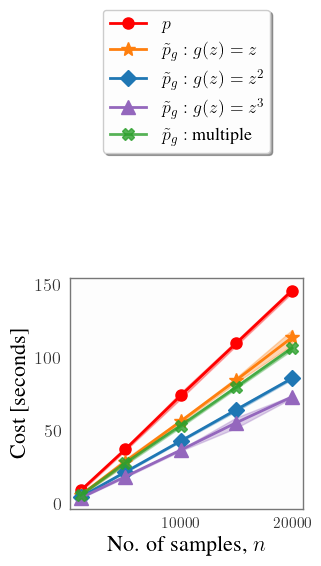

In [47]:
cost_ca_sbi_gamma = np.load("cost_ca_sbi_gamma.npy")
cost_ca_sbi_gamma_k34 = np.load("cost_ca_sbi_gamma_k34.npy")
cost_standard_sbi_gamma = np.load("cost_standard_sbi_gamma.npy")
cost_ca_sbi_gamma_mixture = np.load("cost_ca_sbi_gamma_mixture.npy")

num_sim = np.array([1000, 5000, 10000, 15000, 20000])

point_marker = np.array(["o", '*', "^", "D", "X"]) 

from matplotlib.lines import Line2D
from matplotlib.legend import Legend
from matplotlib.patches import Patch

legend_elements = [Line2D([0], [0], marker='o', color='w', label='n=200',markerfacecolor='red',  markersize=9),
                          Line2D([0], [0], marker='*', color='w', label='n=500',markerfacecolor='C1',  markersize=15),
                          Line2D([0], [0], marker='^', color='w', label='n=1000',markerfacecolor='C0',  markersize=11),
                          Line2D([0], [0], marker='D', color='w', label='n=2000',markerfacecolor='C3',  markersize=9)]

plt.figure(figsize=(3, 3))

line1 = plt.plot(num_sim, np.mean(cost_standard_sbi_gamma, axis = 0), '-o', markersize = 8, label = "$p$", color = "red")
plt.fill_between(num_sim, y1 = np.mean(cost_standard_sbi_gamma, 0)+ 1.96 * np.std(cost_standard_sbi_gamma, 0),  
                 y2 = np.mean(cost_standard_sbi_gamma, 0) - 1.96 * np.std(cost_standard_sbi_gamma, 0), alpha = 0.3, color = "red")

plt.plot(num_sim, np.mean(cost_ca_sbi_gamma[0,:,:], axis = 0), '-*', markersize = 10, label = "$\\tilde{p}_g: g(z)=z$", color = "C1")
plt.fill_between(num_sim, y1 = np.mean(cost_ca_sbi_gamma[0,:,:], 0)+ 1.96 * np.std(cost_ca_sbi_gamma[0,:,:], 0),  
                 y2 = np.mean(cost_ca_sbi_gamma[0,:,:], 0) - 1.96 * np.std(cost_ca_sbi_gamma[0,:,:], 0), alpha = 0.3, color = "C1")

plt.plot(num_sim, np.mean(cost_ca_sbi_gamma[1,:,:], axis = 0), '-D', markersize = 8, label = "$\\tilde{p}_g: g(z)=z^2$", color = "C0")
plt.fill_between(num_sim, y1 = np.mean(cost_ca_sbi_gamma[1,:,:], 0)+ 1.96 * np.std(cost_ca_sbi_gamma[1,:,:], 0),  
                 y2 = np.mean(cost_ca_sbi_gamma[1,:,:], 0) - 1.96 * np.std(cost_ca_sbi_gamma[1,:,:], 0), alpha = 0.3, color = "C0")

plt.plot(num_sim, np.mean(cost_ca_sbi_gamma_k34[0,:,:], axis = 0), '-^', markersize = 10, label = "$\\tilde{p}_g: g(z)=z^3$", 
         color = "C4")
plt.fill_between(num_sim, y1 = np.mean(cost_ca_sbi_gamma_k34[0,:,:], 0)+ 1.96 * np.std(cost_ca_sbi_gamma_k34[0,:,:], 0),  
                 y2 = np.mean(cost_ca_sbi_gamma_k34[0,:,:], 0) - 1.96 * np.std(cost_ca_sbi_gamma_k34[0,:,:], 0), alpha = 0.3,
                 color = "C4")

plt.plot(num_sim, np.mean(cost_ca_sbi_gamma_mixture, axis = 0), '-X', markersize = 8, label = "$\\tilde{p}_g:$ multiple", 
         color = "C2", alpha = 0.8)
plt.fill_between(num_sim, y1 = np.mean(cost_ca_sbi_gamma_mixture, 0)+ 1.96 * np.std(cost_ca_sbi_gamma_mixture, 0),  
                 y2 = np.mean(cost_ca_sbi_gamma_mixture, 0) - 1.96 * np.std(cost_ca_sbi_gamma_mixture, 0), alpha = 0.3,
                 color = "C2")

plt.xlabel("No. of samples, $n$", fontsize=16)
plt.ylabel('Cost [seconds]', fontsize=16)
plt.legend(fontsize=11, frameon = True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 2.2),
          fancybox=True, shadow=True, fontsize = 13,ncol=5)
plt.yticks(fontsize=13)
plt.xticks(fontsize=11)
# plt.savefig('figures/plot_gamma_cost_vs_samples_nolegend.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.savefig('figures/plot_gamma_legend_flat.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

# 2.1 Effective sample size vs. Cost of sampling

In [78]:
num_sim = 20000
num_repeats = 1
k = np.array([0, 0.5, 1, 2, 3]) # Exponent of the penaly function g(z) = z^k

sampling_cost_ca_sbi_gamma = np.zeros(shape = (k.size, num_repeats))
ess_cost_aware = np.zeros(shape = (k.size, num_repeats))

for ind in range(k.size):
    for j in range(num_repeats):
        
        if ind == 0:
            st = time.time()
            theta, x = simulate_for_sbi(simulator, prior, num_simulations=num_sim)
            et = time.time()
            sampling_cost_ca_sbi_gamma[ind, j] = et-st
            ess_cost_aware[ind, j] = num_sim
        else:
            # Sampling from cost-modified prior
            theta_tilde = torch.zeros(num_sim, num_dim)
            count = 0

            st = time.time() # Start time
            while count < num_sim:
                param_value = prior.sample()
                if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                    theta_tilde[count] = param_value
                    count += 1
            # Simulate from the Gamma distribution
            x_tilde = torch.zeros(num_sim, 2)
            for l in range(num_sim):
                x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])
                
            et = time.time() # End time
            sampling_cost_ca_sbi_gamma[ind, j] = et-st

            w_u = u.cost_linear(theta_tilde, alpha, beta)**k[ind]    #self-normalised importance weights

            ess_cost_aware[ind, j] = (w_u.sum())**2 / torch.square(w_u).sum()
    print(ind)
    
np.save("sampling_cost_ca_sbi_gamma", sampling_cost_ca_sbi_gamma)
np.save("ess_cost_aware", ess_cost_aware)

Running 20000 simulations.:   0%|          | 0/20000 [00:00<?, ?it/s]

0
1
2
3
4


In [81]:
(ess_cost_aware / sampling_cost_ca_sbi_gamma) / num_sim * 100

array([[0.63514895],
       [0.6764407 ],
       [0.63785613],
       [0.44054455],
       [0.20314515]])

In [9]:
ess_cost_aware = np.load("ess_cost_aware.npy")
sampling_cost_ca_sbi_gamma = np.load("sampling_cost_ca_sbi_gamma.npy")
print(ess_cost_aware/20000)
print(sampling_cost_ca_sbi_gamma[0])

[[1.        ]
 [0.94432109]
 [0.79835581]
 [0.42049194]
 [0.16056941]]
[157.44338512]


In [11]:
(ess_cost_aware * sampling_cost_ca_sbi_gamma[0] / sampling_cost_ca_sbi_gamma / 20000

array([[1.        ],
       [1.06501114],
       [1.00426229],
       [0.69360825],
       [0.3198386 ]])

In [18]:
sampling_cost_ca_sbi_gamma[0] / sampling_cost_ca_sbi_gamma

array([[1.        ],
       [1.12780615],
       [1.25791317],
       [1.64951616],
       [1.99190243]])

# 2.2 Effective sample size x CEG

In [12]:
num_sim = 20000
num_repeats = 1
k = np.array([0, 0.5, 1, 2, 3]) # Exponent of the penaly function g(z) = z^k

ess_cost_aware = np.zeros(shape = (k.size, num_repeats))
ceg = np.zeros(shape = (k.size, num_repeats))

for ind in range(k.size):
    for j in range(num_repeats):
        
        if ind == 0:

            theta = prior.sample((num_sim,))

            ess_cost_aware[ind, j] = 1
            ceg[ind, j] = 1
        else:
            # Sampling from cost-modified prior
            theta_tilde = torch.zeros(num_sim, num_dim)
            count = 0

            while count < num_sim:
                param_value = prior.sample()
                if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                    theta_tilde[count] = param_value
                    count += 1

            w_u = u.cost_linear(theta_tilde, alpha, beta)**k[ind]   #self-normalised importance weights
            
            # Compute CEG
            ceg[ind, j] = torch.mean(u.cost_linear(theta, alpha, beta)) / torch.mean(u.cost_linear(theta_tilde, alpha, beta))
            # Compute ESS
            ess_cost_aware[ind, j] = ((w_u.sum())**2 / torch.square(w_u).sum()) / num_sim
    print(ind)

0
1
2
3
4


In [13]:
ceg

array([[1.        ],
       [1.04068959],
       [1.08248484],
       [1.17308009],
       [1.27506375]])

# 3. Accuracy vs. Cost

In [14]:
from sbi import utils as utils
from sbi import analysis as analysis
from cost_aware_snpe_c import CostAwareSNPE_C
from sbi.inference.snpe.snpe_c import SNPE_C

import seaborn as sns
%load_ext autoreload
%autoreload 2

n_samples_posterior = 1000 # Number of samples of NPE posterior

theta_true = 750

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples

lengthscale = u.median_heuristic(true_pos_samples)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3.1 Standard NPE

In [7]:
def run_npe(theta, x, x_obs, prior):
    inference = SNPE(prior=prior, density_estimator="maf")

    posteriors = []
    proposal = prior

    density_estimator = inference.append_simulations(
        theta, x, proposal=proposal
        ).train()

    # Drawing samples from the posterior given the observed data
    posterior = inference.build_posterior(density_estimator)
    posteriors.append(posterior)
    proposal = posterior.set_default_x(x_obs)
    
    return(posterior.sample((n_samples_posterior,), x=x_obs))

In [ ]:
num_sim = 5000
num_repeats = 5

cost_standard_sbi_gamma = np.zeros(shape = (num_repeats,))
posterior_standard_sbi_gamma = np.zeros(shape = (num_repeats, n_samples_posterior))
MMDvals_standard = np.zeros(shape = (num_repeats,))

for j in range(num_repeats):

    st = time.time()
    theta, x = simulate_for_sbi(simulator, prior, num_simulations=num_sim)
    et = time.time()
    cost_standard_sbi_gamma[j] = et-st
    
    posterior_standard_sbi_gamma[j,:] = run_npe(theta=theta, x=x, x_obs=x_obs, prior=prior)[:,0]
    
    MMDvals_standard[j] = u.MMD_unweighted(posterior_standard_sbi_gamma[j], true_pos_samples[:,0], lengthscale)
        
np.save("cost_standard_sbi_gamma_"+str(num_sim)+"_"+str(theta_true), cost_standard_sbi_gamma)
np.save("posterior_standard_sbi_gamma_"+str(num_sim)+"_"+str(theta_true), posterior_standard_sbi_gamma)
np.save("MMDvals_standard_"+str(num_sim)+"_"+str(theta_true), MMDvals_standard)

## Plotting standard NPE posteriors

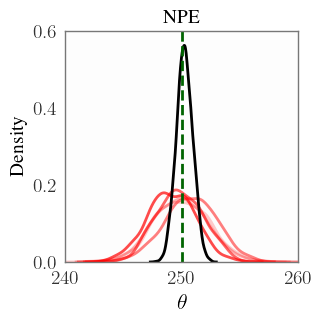

In [58]:
posterior_standard_sbi_gamma = np.load("posterior_standard_sbi_gamma_5000_250.npy")

# Plotting
fig, axes = plt.subplots(1, figsize=(3, 3))

sns.kdeplot(posterior_standard_sbi_gamma[0,:], color = "red", linewidth = 2, linestyle = "solid", label = "NPE", alpha = 0.6)
sns.kdeplot(posterior_standard_sbi_gamma[1,:], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.5)
sns.kdeplot(posterior_standard_sbi_gamma[2,:], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.3)
sns.kdeplot(posterior_standard_sbi_gamma[3,:], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.2)
sns.kdeplot(posterior_standard_sbi_gamma[4,:], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.7)
sns.kdeplot(true_pos_samples[:,0], color = "black", linewidth = 2, linestyle = "solid", label = "True pos.")
axes.set_xlabel("$\\theta$", fontsize = 16)
axes.axvline(theta_true, color = "darkgreen", linestyle = "dashed")
plt.title("NPE")
plt.xlim(240,260)
plt.ylim(0, 0.6)
plt.savefig('figures/plot_gamma_posteriors_npe_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## 3.2 Cost-aware NPE

In [4]:
def run_ca_npe(theta_tilde, x_tilde, x_obs, weights):
    inference_ca = CostAwareSNPE_C()
#     density_estimator_ca = inference_ca.append_simulations(theta_tilde, x_tilde, proposal=None).append_weights(w_u).train()
    density_estimator_canpe = inference_ca.append_simulations(theta_tilde, x_tilde).append_weights(weights, k_indicator_canpe).train()
    posterior_ca = inference_ca.build_posterior(density_estimator_canpe, prior=prior)
    return(posterior_ca.sample((n_samples_posterior,), x=x_obs))

In [43]:
num_sim = 5000
num_repeats = 5
k = np.array([1,2,3,4]) # Exponent of the penaly function g(z) = z^k

cost_ca_sbi_gamma = np.zeros(shape = (k.size, num_repeats))
posterior_ca_sbi_gamma = np.zeros(shape = (k.size, num_repeats, n_samples_posterior))
MMDvals_cost_aware = np.zeros(shape = (k.size, num_repeats))

for ind in range(k.size):
    for j in range(num_repeats):

        # Sampling from cost-modified prior
        theta_tilde = torch.zeros(num_sim, num_dim)
        count = 0

        st = time.time() # Start time
        while count < num_sim:
            param_value = prior.sample()
            if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                theta_tilde[count] = param_value
                count += 1

        # Simulate from the Gamma distribution
        x_tilde = torch.zeros(num_sim, 2)
        for l in range(num_sim):
            x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])

        et = time.time() # End time
        cost_ca_sbi_gamma[ind, j] = et-st
            
        w_u = u.cost_linear(theta_tilde, alpha, beta)**k[ind]    #self-normalised importance weights
        
        posterior_ca_sbi_gamma[ind,j,:] = run_ca_npe(theta_tilde=theta_tilde, x_tilde=x_tilde, x_obs=x_obs, weights=w_u)[:,0]
        
        MMDvals_cost_aware[ind, j] = u.MMD_unweighted(posterior_ca_sbi_gamma[ind, j, :], true_pos_samples[:,0], lengthscale)
    print(ind)
    
np.save("cost_ca_sbi_gamma_"+str(num_sim)+"_"+str(theta_true), cost_ca_sbi_gamma)
np.save("posterior_ca_sbi_gamma_"+str(num_sim)+"_"+str(theta_true), posterior_ca_sbi_gamma)
np.save("MMDvals_cost_aware_"+str(num_sim)+"_"+str(theta_true), MMDvals_cost_aware)

 Neural network successfully converged after 68 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 81 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 86 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 139 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 40 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

0
 Neural network successfully converged after 110 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 65 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 46 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 55 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 40 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

1
 Neural network successfully converged after 44 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 100 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 53 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 40 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 59 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

2
 Neural network successfully converged after 60 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 85 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 52 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 96 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 57 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

3


## 3.3 Multiple importance sampling 

In [17]:
from sbi import utils as utils
from sbi import analysis as analysis
from cost_aware_snpe_c import CostAwareSNPE_C
from sbi.inference.snpe.snpe_c import SNPE_C

import seaborn as sns
%load_ext autoreload
%autoreload 2

n_samples_posterior = 1000 # Number of samples of NPE posterior

theta_true = 750

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples

lengthscale = u.median_heuristic(true_pos_samples)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
num_sim = 5000
num_repeats = 5

k = np.array([0, 1, 2, 3]) # Exponent of the penaly function g(z) = z^k

num_mixtures = k.size
num_per_mixture = int(round(num_sim / num_mixtures))

k_indicator_canpe = torch.cat((torch.zeros(num_per_mixture), torch.ones(num_per_mixture), 2*torch.ones(num_per_mixture), 
                       3*torch.ones(num_per_mixture)), 0)
k_indicator_canpe = k_indicator_canpe.to(torch.int)

cost_multiple_gamma = np.zeros(shape = (num_repeats,))
posterior_multiple_gamma = np.zeros(shape = (num_repeats, n_samples_posterior))
MMDvals_cost_aware_multiple = np.zeros(shape = (num_repeats,))

for j in range(num_repeats):

    # Sampling from cost-modified prior
    theta_tilde = torch.zeros(num_sim, num_dim)
    w_u = torch.zeros(num_sim,)
    count = 0

    st = time.time() # Start time
    for ind in range(k.size):
        while count < ((ind + 1)*num_per_mixture):
            param_value = prior.sample()
            if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                theta_tilde[count] = param_value
                w_u[count] = u.cost_linear(theta_tilde[count], alpha, beta)**k[ind]    #self-normalised importance weights
                count += 1
    
        # Simulate from the Gamma distribution
    x_tilde = torch.zeros(num_sim, 2)
    for l in range(num_sim):
        x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])

    et = time.time() # End time
    cost_multiple_gamma[j] = et-st
    print(et-st)
    posterior_multiple_gamma[j,:] = run_ca_npe(theta_tilde=theta_tilde, x_tilde=x_tilde, x_obs=x_obs, weights=w_u)[:,0]

    MMDvals_cost_aware_multiple[j] = u.MMD_unweighted(posterior_multiple_gamma[j, :], true_pos_samples[:,0], lengthscale)
    
np.save("MMDvals_cost_aware_multiple"+str(num_sim)+"_"+str(theta_true), MMDvals_cost_aware_multiple)
np.save("cost_multiple_gamma"+str(num_sim)+"_"+str(theta_true), cost_multiple_gamma)
np.save("posterior_multiple_gamma"+str(num_sim)+"_"+str(theta_true), posterior_multiple_gamma)

25.362380981445312


C:\Users\bhartia1\OneDrive - Aalto University\Software\cost-aware LFI\venv\lib\site-packages\sbi\neural_nets\flow.py:142: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn("In one-dimensional output space, this flow is limited to Gaussians")


 Neural network successfully converged after 32 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

25.246176719665527
 Neural network successfully converged after 55 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

25.196783542633057
 Neural network successfully converged after 37 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

25.171828508377075
 Neural network successfully converged after 45 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

25.676637411117554
 Neural network successfully converged after 30 epochs.

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

## Plotting

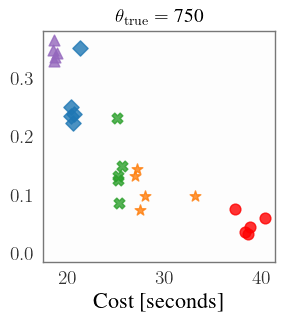

In [20]:
theta_true = 750

cost_ca_sbi_gamma = np.load("cost_ca_sbi_gamma_5000_"+str(theta_true)+".npy")
cost_standard_sbi_gamma = np.load("cost_standard_sbi_gamma_5000_"+str(theta_true)+".npy")
MMDvals_standard = np.load("MMDvals_standard_5000_"+str(theta_true)+".npy")
MMDvals_cost_aware = np.load("MMDvals_cost_aware_5000_"+str(theta_true)+".npy")
cost_multiple_gamma = np.load("cost_multiple_gamma5000_"+str(theta_true)+".npy")
MMDvals_cost_aware_multiple = np.load("MMDvals_cost_aware_multiple5000_"+str(theta_true)+".npy")

point_marker = np.array(["o", '*', "^", "D", "X"]) 

plt.figure(figsize=(3, 3))

plt.scatter(cost_standard_sbi_gamma, MMDvals_standard, marker = point_marker[0], color = "red", s = 60, 
            alpha = 0.8, label = "NPE")
plt.scatter(cost_ca_sbi_gamma[0,:], MMDvals_cost_aware[0,:], marker = point_marker[1], color = "C1", s = 65, 
            alpha = 0.8, label = "Ca-NPE: $g(z) = z$")
plt.scatter(cost_ca_sbi_gamma[1,:], MMDvals_cost_aware[1,:], marker = point_marker[3], color = "C0", s = 60, 
            alpha = 0.8, label = "Ca-NPE: $g(z) = z^2$")
plt.scatter(cost_ca_sbi_gamma[2,:], MMDvals_cost_aware[2,:], marker = point_marker[2], color = "C4", s = 60, 
            alpha = 0.8, label = "Ca-NPE: $g(z) = z^3$")
# plt.scatter(cost_ca_sbi_gamma[3,:], MMDvals_cost_aware[3,:], marker = point_marker[4], color = "C4", s = 60, 
#             alpha = 0.8, label = "Ca-NPE: $g(z) = z^4$")
plt.scatter(cost_multiple_gamma, MMDvals_cost_aware_multiple, marker = point_marker[4], color = "C2", s = 60, 
            alpha = 0.8, label = "Ca-NPE: multiple")

# plt.legend(fontsize = 11)
plt.title("$\\theta_{\mathrm{true}} = $ "+str(theta_true))
plt.xlabel('Cost [seconds]', fontsize = 16)
plt.ylim(-0.015, 0.38)
#plt.ylabel('$\widehat{\mathrm{MMD}}^2$', fontsize=15)
plt.savefig('figures/plot_gamma_accuracy_vs_cost_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## Plotting cost-aware NPE posteriors

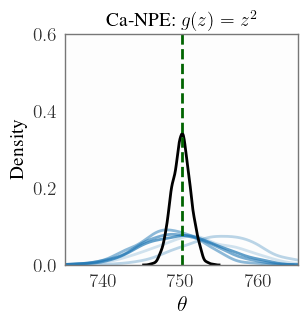

In [51]:
posterior_standard_sbi_gamma = np.load("posterior_ca_sbi_gamma_5000_750.npy")
index = 1
# Plotting
fig, axes = plt.subplots(1, figsize=(3, 3))

sns.kdeplot(posterior_standard_sbi_gamma[index,0,:], color = "C0", linewidth = 2, linestyle = "solid", label = "Ca-NPE", alpha = 0.6)
sns.kdeplot(posterior_standard_sbi_gamma[index, 1,:], color = "C0", linewidth = 2, linestyle = "solid", alpha = 0.5)
sns.kdeplot(posterior_standard_sbi_gamma[index,2,:], color = "C0", linewidth = 2, linestyle = "solid", alpha = 0.3)
sns.kdeplot(posterior_standard_sbi_gamma[index,3,:], color = "C0", linewidth = 2, linestyle = "solid", alpha = 0.2)
sns.kdeplot(posterior_standard_sbi_gamma[index,4,:], color = "C0", linewidth = 2, linestyle = "solid", alpha = 0.7)
sns.kdeplot(true_pos_samples[:,0], color = "black", linewidth = 2, linestyle = "solid", label = "True pos.")
axes.set_xlabel("$\\theta$", fontsize = 16)
axes.axvline(theta_true, color = "darkgreen", linestyle = "dashed")
plt.title("Ca-NPE: $g(z) = z^2$")
plt.xlim(735,765)
plt.ylim(0, 0.6)
# plt.legend()
plt.savefig('figures/plot_gamma_posteriors_ca_npe_k2_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

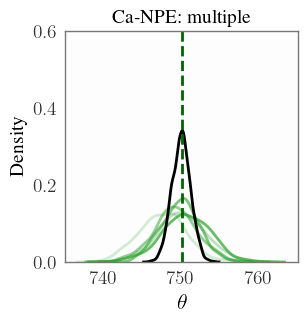

In [20]:
posterior_multiple_gamma = np.load("posterior_multiple_gamma5000_750.npy")
# Plotting
fig, axes = plt.subplots(1, figsize=(3, 3))

sns.kdeplot(posterior_multiple_gamma[0,:], color = "C2", linewidth = 2, linestyle = "solid", label = "Ca-NPE", alpha = 0.6)
sns.kdeplot(posterior_multiple_gamma[1,:], color = "C2", linewidth = 2, linestyle = "solid", alpha = 0.5)
sns.kdeplot(posterior_multiple_gamma[2,:], color = "C2", linewidth = 2, linestyle = "solid", alpha = 0.3)
sns.kdeplot(posterior_multiple_gamma[3,:], color = "C2", linewidth = 2, linestyle = "solid", alpha = 0.2)
sns.kdeplot(posterior_multiple_gamma[4,:], color = "C2", linewidth = 2, linestyle = "solid", alpha = 0.7)
sns.kdeplot(true_pos_samples[:,0], color = "black", linewidth = 2, linestyle = "solid", label = "True pos.")
axes.set_xlabel("$\\theta$", fontsize = 16)
axes.axvline(theta_true, color = "darkgreen", linestyle = "dashed")
plt.title("Ca-NPE: multiple")
# plt.xlim(240,260)
# plt.xlim(490,510)
plt.xlim(735,765)
plt.ylim(0, 0.6)
# plt.legend()
plt.savefig('figures/plot_gamma_posteriors_ca_npe_mixture_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

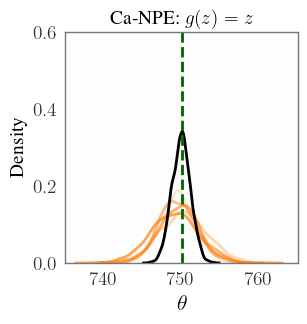

In [52]:
posterior_standard_sbi_gamma = np.load("posterior_ca_sbi_gamma_5000_750.npy")
index = 0
# Plotting
fig, axes = plt.subplots(1, figsize=(3, 3))

sns.kdeplot(posterior_standard_sbi_gamma[index,0,:], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
sns.kdeplot(posterior_standard_sbi_gamma[index, 1,:], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.5)
sns.kdeplot(posterior_standard_sbi_gamma[index,2,:], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.3)
sns.kdeplot(posterior_standard_sbi_gamma[index,3,:], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.2)
sns.kdeplot(posterior_standard_sbi_gamma[index,4,:], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.7)
sns.kdeplot(true_pos_samples[:,0], color = "black", linewidth = 2, linestyle = "solid", label = "True pos.")
axes.set_xlabel("$\\theta$", fontsize = 16)
axes.axvline(theta_true, color = "darkgreen", linestyle = "dashed")
plt.title("Ca-NPE: $g(z) = z$")
plt.xlim(735,765)
plt.ylim(0, 0.6)
# plt.legend()
plt.savefig('figures/plot_gamma_posteriors_ca_npe_k1_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## 3.3 Standard ABC

In [4]:
theta_true = 250

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples

lengthscale = u.median_heuristic(true_pos_samples)

In [89]:
num_sim = 50000
num_repeats = 5
epsilon_distance = 0.05

cost_standard_abc_gamma = np.zeros(shape = (num_repeats,))
MMDvals_standard_abc = np.zeros(shape = (num_repeats,))

for j in range(num_repeats):

    st = time.time()
    theta, x = simulate_for_sbi(simulator, prior, num_simulations=num_sim)
    et = time.time()
    cost_standard_abc_gamma[j] = et-st
    
    samples, _ = u.rejection_ABC(x_obs, theta, x, epsilon_distance)
    np.save("posterior_abc_gamma_"+str(theta_true)+"_"+str(j), samples)
    print(samples.shape)
    
    MMDvals_standard_abc[j] = u.MMD_unweighted(samples[:,0], true_pos_samples[:,0], lengthscale)
        
np.save("cost_standard_abc_gamma_"+str(num_sim)+"_"+str(theta_true), cost_standard_abc_gamma)
np.save("MMDvals_standard_abc_"+str(num_sim)+"_"+str(theta_true), MMDvals_standard_abc)

Running 50000 simulations.:   0%|          | 0/50000 [00:00<?, ?it/s]

torch.Size([207, 1])


Running 50000 simulations.:   0%|          | 0/50000 [00:00<?, ?it/s]

torch.Size([178, 1])


Running 50000 simulations.:   0%|          | 0/50000 [00:00<?, ?it/s]

torch.Size([205, 1])


Running 50000 simulations.:   0%|          | 0/50000 [00:00<?, ?it/s]

torch.Size([182, 1])


Running 50000 simulations.:   0%|          | 0/50000 [00:00<?, ?it/s]

torch.Size([198, 1])


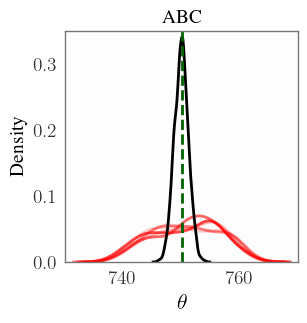

In [133]:
theta_true = 750

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples

samples0 = np.load("posterior_abc_gamma_"+str(theta_true)+"_0.npy")
samples1 = np.load("posterior_abc_gamma_"+str(theta_true)+"_1.npy")
samples2 = np.load("posterior_abc_gamma_"+str(theta_true)+"_2.npy")
samples3 = np.load("posterior_abc_gamma_"+str(theta_true)+"_3.npy")
samples4 = np.load("posterior_abc_gamma_"+str(theta_true)+"_4.npy")

# samples0 = np.load("posterior_abc_gamma_250_0.npy")
# samples1 = np.load("posterior_abc_gamma_250_1.npy")
# samples2 = np.load("posterior_abc_gamma_250_2.npy")
# samples3 = np.load("posterior_abc_gamma_250_3.npy")
# samples4 = np.load("posterior_abc_gamma_250_4.npy")

# samples0 = np.load("posterior_abc_gamma_750_0.npy")
# samples1 = np.load("posterior_abc_gamma_750_1.npy")
# samples2 = np.load("posterior_abc_gamma_750_2.npy")
# samples3 = np.load("posterior_abc_gamma_750_3.npy")
# samples4 = np.load("posterior_abc_gamma_750_4.npy")

# Plotting
fig, axes = plt.subplots(1, figsize=(3, 3))

sns.kdeplot(samples0[:,0], color = "red", linewidth = 2, linestyle = "solid", label = "ABC", alpha = 0.6)
sns.kdeplot(samples1[:,0], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.5)
sns.kdeplot(samples2[:,0], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.3)
sns.kdeplot(samples3[:,0], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.2)
sns.kdeplot(samples4[:,0], color = "red", linewidth = 2, linestyle = "solid", alpha = 0.7)
sns.kdeplot(true_pos_samples[:,0], color = "black", linewidth = 2, linestyle = "solid", label = "True pos.")
axes.set_xlabel("$\\theta$", fontsize = 16)
axes.axvline(theta_true, color = "darkgreen", linestyle = "dashed")

#For theta_true = 250
# plt.ylim(0, 0.575)
# plt.xlim(230, 270)

#For theta_true = 500
# plt.ylim(0, 0.375)
# plt.xlim(480, 520)

#For theta_true = 750
# plt.ylim(0, 0.35)
# plt.xlim(730, 770)

plt.title("ABC")
plt.savefig('figures/plot_gamma_posteriors_abc_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## 3.4 Cost-aware ABC

In [6]:
num_sim = 50000
num_repeats = 5
epsilon_distance = 0.05
k = np.array([1,2,3,4]) # Exponent of the penaly function g(z) = z^k

cost_ca_abc_gamma = np.zeros(shape = (k.size, num_repeats))
MMDvals_cost_aware_abc = np.zeros(shape = (k.size, num_repeats))

for ind in range(k.size):
    for j in range(num_repeats):

        # Sampling from cost-modified prior
        theta_tilde = torch.zeros(num_sim, num_dim)
        count = 0

        st = time.time() # Start time
        while count < num_sim:
            param_value = prior.sample()
            if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                theta_tilde[count] = param_value
                count += 1

        # Simulate from the Gamma distribution
        x_tilde = torch.zeros(num_sim, 2)
        for l in range(num_sim):
            x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])

        et = time.time() # End time
        cost_ca_abc_gamma[ind, j] = et-st
        
        samples, _ = u.rejection_ABC(x_obs, theta_tilde, x_tilde, epsilon_distance)
        w_u = u.cost_linear(samples, alpha, beta)**k[ind]    #self-normalised importance weights
        
        if ind == 0:
            np.save("posterior_ca_abc_gamma_k1_"+str(theta_true)+"_"+str(j), samples)
            np.save("weights_ca_abc_gamma_k1_"+str(theta_true)+"_"+str(j), w_u/w_u.sum())
        elif ind == 1:
            np.save("posterior_ca_abc_gamma_k2_"+str(theta_true)+"_"+str(j), samples)
            np.save("weights_ca_abc_gamma_k2_"+str(theta_true)+"_"+str(j), w_u/w_u.sum())
        
        MMDvals_cost_aware_abc[ind, j] = u.MMD_weighted(samples[:,0], true_pos_samples[:,0], (w_u/w_u.sum())[:,0], lengthscale)
    print(ind)
    
np.save("cost_ca_abc_gamma"+str(num_sim)+"_"+str(theta_true), cost_ca_abc_gamma)
np.save("MMDvals_cost_aware_abc"+str(num_sim)+"_"+str(theta_true), MMDvals_cost_aware_abc)

0
1
2
3


In [27]:
theta_true = 500

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples

lengthscale = u.median_heuristic(true_pos_samples)

In [ ]:
num_sim = 50000
num_repeats = 5
k = np.array([1,2,3]) # Exponent of the penaly function g(z) = z^k

cost_ca_abc_gamma = np.zeros(shape = (k.size, num_repeats))
MMDvals_cost_aware_abc = np.zeros(shape = (k.size, num_repeats))

for ind in range(k.size):
    for j in range(num_repeats):

        # Sampling from cost-modified prior
        theta_tilde = torch.zeros(num_sim, num_dim)
        count = 0

        st = time.time() # Start time
        while count < num_sim:
            param_value = prior.sample()
            if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                theta_tilde[count] = param_value
                count += 1

        # Simulate from the Gamma distribution
        x_tilde = torch.zeros(num_sim, 2)
        for l in range(num_sim):
            x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])

        et = time.time() # End time
        cost_ca_abc_gamma[ind, j] = et-st
        
        samples, _ = u.rejection_ABC(x_obs, theta_tilde, x_tilde, epsilon_distance)
        w_u = u.cost_linear(samples, alpha, beta)**k[ind]    #self-normalised importance weights
        
        if ind == 0:
            np.save("posterior_ca_abc_gamma_k1_"+str(theta_true)+"_"+str(j), samples)
            np.save("weights_ca_abc_gamma_k1_"+str(theta_true)+"_"+str(j), w_u/w_u.sum())
        elif ind == 1:
            np.save("posterior_ca_abc_gamma_k2_"+str(theta_true)+"_"+str(j), samples)
            np.save("weights_ca_abc_gamma_k2_"+str(theta_true)+"_"+str(j), w_u/w_u.sum())
        
        MMDvals_cost_aware_abc[ind, j] = u.MMD_weighted(samples[:,0], true_pos_samples[:,0], (w_u/w_u.sum())[:,0], lengthscale)
    print(ind)
    
np.save("cost_ca_abc_gamma"+str(num_sim)+"_"+str(theta_true), cost_ca_abc_gamma)
np.save("MMDvals_cost_aware_abc"+str(num_sim)+"_"+str(theta_true), MMDvals_cost_aware_abc)

In [53]:
theta_true = 750

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples

lengthscale = u.median_heuristic(true_pos_samples)

In [55]:
num_sim = 50000
num_repeats = 5
k = np.array([1,2,3]) # Exponent of the penaly function g(z) = z^k

cost_ca_abc_gamma = np.zeros(shape = (k.size, num_repeats))
MMDvals_cost_aware_abc = np.zeros(shape = (k.size, num_repeats))

for ind in range(k.size):
    for j in range(num_repeats):

        # Sampling from cost-modified prior
        theta_tilde = torch.zeros(num_sim, num_dim)
        count = 0

        st = time.time() # Start time
        while count < num_sim:
            param_value = prior.sample()
            if u.A_theta_Gamma(param_value, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                theta_tilde[count] = param_value
                count += 1

        # Simulate from the Gamma distribution
        x_tilde = torch.zeros(num_sim, 2)
        for l in range(num_sim):
            x_tilde[l,:] = u.gamma_sampler(theta_tilde[l])

        et = time.time() # End time
        cost_ca_abc_gamma[ind, j] = et-st
        
        samples, _ = u.rejection_ABC(x_obs, theta_tilde, x_tilde, epsilon_distance)
        w_u = u.cost_linear(samples, alpha, beta)**k[ind]    #self-normalised importance weights
        
        if ind == 0:
            np.save("posterior_ca_abc_gamma_k1_"+str(theta_true)+"_"+str(j), samples)
            np.save("weights_ca_abc_gamma_k1_"+str(theta_true)+"_"+str(j), w_u/w_u.sum())
        elif ind == 1:
            np.save("posterior_ca_abc_gamma_k2_"+str(theta_true)+"_"+str(j), samples)
            np.save("weights_ca_abc_gamma_k2_"+str(theta_true)+"_"+str(j), w_u/w_u.sum())

        w_u = u.cost_linear(samples, alpha, beta)**k[ind]    #self-normalised importance weights
        
        MMDvals_cost_aware_abc[ind, j] = u.MMD_weighted(samples[:,0], true_pos_samples[:,0], (w_u/w_u.sum())[:,0], lengthscale)
    print(ind)
    
np.save("cost_ca_abc_gamma"+str(num_sim)+"_"+str(theta_true), cost_ca_abc_gamma)
np.save("MMDvals_cost_aware_abc"+str(num_sim)+"_"+str(theta_true), MMDvals_cost_aware_abc)

0
1


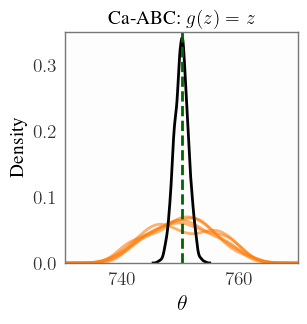

In [57]:
theta_true = 750
ind = 1 

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
        
    xlim_start = 480
    xlim_end = 520
    ylim_end = 0.375
    
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
    
    xlim_start = 230 
    xlim_end = 270
    ylim_end = 0.575
    
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples
        
    xlim_start = 730
    xlim_end = 770
    ylim_end = 0.35
    
samples0 = np.load("posterior_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_0.npy")
samples1 = np.load("posterior_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_1.npy")
samples2 = np.load("posterior_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_2.npy")
samples3 = np.load("posterior_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_3.npy")
samples4 = np.load("posterior_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_4.npy")

w0 = np.load("weights_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_0.npy")
w1 = np.load("weights_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_1.npy")
w2 = np.load("weights_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_2.npy")
w3 = np.load("weights_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_3.npy")
w4 = np.load("weights_ca_abc_gamma_k"+str(ind)+"_"+str(theta_true)+"_4.npy")

from scipy.stats import gaussian_kde

kernel0 = gaussian_kde(samples0[:,0], weights=w0[:,0])
kernel1 = gaussian_kde(samples1[:,0], weights=w1[:,0])
kernel2 = gaussian_kde(samples2[:,0], weights=w2[:,0])
kernel3 = gaussian_kde(samples3[:,0], weights=w3[:,0])
kernel4 = gaussian_kde(samples4[:,0], weights=w4[:,0])

# Plotting
fig, axes = plt.subplots(1, figsize=(3, 3))

plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel0(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C1",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel1(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C1",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel2(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C1",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel3(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C1",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel4(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C1",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)

# sns.kdeplot(samples0[:,0], color = "C1", linewidth = 2, linestyle = "solid", label = "Ca-ABC", alpha = 0.6)
# sns.kdeplot(samples1[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
# sns.kdeplot(samples2[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
# sns.kdeplot(samples3[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
# sns.kdeplot(samples4[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
sns.kdeplot(true_pos_samples[:,0], color = "black", linewidth = 2, linestyle = "solid", label = "True pos.")
axes.set_xlabel("$\\theta$", fontsize = 16)
axes.axvline(theta_true, color = "darkgreen", linestyle = "dashed")
plt.title("Ca-ABC: $g(z) = z$")
# plt.ylim(0, 0.575)
plt.ylim(0, ylim_end)
plt.xlim(xlim_start, xlim_end)

plt.savefig('figures/plot_gamma_posteriors_ca_abc_k'+str(ind)+'_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## Plotting

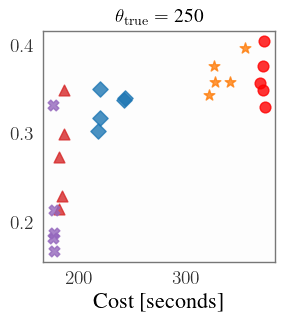

In [26]:
theta_true = 250

cost_standard_abc_gamma = np.load("cost_standard_abc_gamma_50000_"+str(theta_true)+".npy")
MMDvals_standard_abc = np.load("MMDvals_standard_abc_50000_"+str(theta_true)+".npy")

cost_ca_abc_gamma = np.load("cost_ca_abc_gamma50000_"+str(theta_true)+".npy")
MMDvals_cost_aware_abc = np.load("MMDvals_cost_aware_abc50000_"+str(theta_true)+".npy")

point_marker = np.array(["o", '*', "^", "D", "X"]) 

plt.figure(figsize=(3, 3))

plt.scatter(cost_standard_abc_gamma, MMDvals_standard_abc, marker = point_marker[0], color = "red", s = 60, 
            alpha = 0.8, label = "ABC")
plt.scatter(cost_ca_abc_gamma[0,:], MMDvals_cost_aware_abc[0,:], marker = point_marker[1], color = "C1", s = 65, 
            alpha = 0.8, label = "Ca-ABC: $g(z) = z$")
plt.scatter(cost_ca_abc_gamma[1,:], MMDvals_cost_aware_abc[1,:], marker = point_marker[3], color = "C0", s = 60, 
            alpha = 0.8, label = "Ca-ABC: $g(z) = z^2$")
plt.scatter(cost_ca_abc_gamma[2,:], MMDvals_cost_aware_abc[2,:], marker = point_marker[2], color = "C3", s = 60, 
            alpha = 0.8, label = "Ca-ABC: $g(z) = z^3$")
plt.scatter(cost_ca_abc_gamma[3,:], MMDvals_cost_aware_abc[3,:], marker = point_marker[4], color = "C4", s = 60, 
            alpha = 0.8, label = "Ca-ABC: $g(z) = z^4$")
# plt.legend(fontsize = 11)
plt.title("$\\theta_{\mathrm{true}} = $ "+str(theta_true))
plt.xlabel('Cost [seconds]', fontsize = 16)
# plt.ylabel('$\widehat{\mathrm{MMD}}^2$', fontsize=15)
plt.savefig('figures/plot_gamma_abc_accuracy_vs_cost_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

## Multiple ABC

In [4]:
from sbi import utils as utils
from sbi import analysis as analysis
from cost_aware_snpe_c import CostAwareSNPE_C
from sbi.inference.snpe.snpe_c import SNPE_C

import seaborn as sns
%load_ext autoreload
%autoreload 2

n_samples_posterior = 1000 # Number of samples of NPE posterior

theta_true = 750

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples

lengthscale = u.median_heuristic(true_pos_samples)

## Multiple ABC

In [8]:
num_sim = 50000
num_repeats = 5
epsilon_distance = 0.05

k = np.array([0, 1, 2, 3]) # Exponent of the penaly function g(z) = z^k

num_mixtures = k.size
num_per_mixture = int(round(num_sim / num_mixtures))

cost_mixture_gamma = torch.zeros(size = (num_repeats,))
posterior_mixture_gamma = torch.zeros(size = (num_repeats, n_samples_posterior))
MMDvals_multiple_abc = np.zeros(shape = (num_repeats,))

for j in range(num_repeats):
    
    thetas_ca = torch.empty([num_mixtures, num_per_mixture, 1])
    xs_ca = torch.empty([num_mixtures, num_per_mixture, 2])
    weights_ca = torch.empty([num_mixtures, num_per_mixture])
    posterior_samples_caabc = None
    weights = None
    
    # Sampling from cost-modified prior
    theta_tilde = torch.zeros(num_sim, num_dim)
    w_u = torch.zeros(num_sim,)
    end_time = 0
    for ind in range(num_mixtures):
        count = 0
        weights_for_k = []
        start_time = time.time()
        while count < num_per_mixture:
            theta_ = prior.sample()
            # print(calc_acc_prob(cost_linear, alpha, beta, theta_, theta_low, k_mixture[ind]))
            if u.A_theta_Gamma(theta_, k[ind], alpha = alpha, beta=beta, prior_start=prior_start) > torch.rand(1):
                thetas_ca[ind, count] = theta_.reshape(-1)
                weights_for_k.append(u.cost_linear(theta_, alpha, beta)**k[ind]) 
                count += 1
        weights_ca[ind] = torch.tensor(weights_for_k).reshape(-1)

        xs_ca[ind] = torch.vstack([u.gamma_sampler(theta) for theta in thetas_ca[ind]])
        end_time += time.time() - start_time

        posterior_samples_caabc_per_mixture, indices = u.rejection_ABC(x_obs, thetas_ca[ind], xs_ca[ind], epsilon_distance)
        #print(indices)
        #print(weights_ca[ind], [indices[0]])
        
        weights_per_mixture = weights_ca[ind, indices[0]] / (weights_ca[ind, indices[0]].sum()*num_mixtures)

        if posterior_samples_caabc is None:
            posterior_samples_caabc = posterior_samples_caabc_per_mixture
            weights = weights_per_mixture
        else:
            posterior_samples_caabc = torch.cat([posterior_samples_caabc,posterior_samples_caabc_per_mixture], axis=0)
            weights = torch.cat([weights, weights_per_mixture], axis=0)
    print(f"CA-ABC cost: {end_time}")
    cost_mixture_gamma[j] = end_time
    
    np.save("posterior_ca_abc_gamma_multiple_"+str(theta_true)+"_"+str(j), posterior_samples_caabc)
    np.save("weights_ca_abc_gamma_multiple_"+str(theta_true)+"_"+str(j), weights)
    
    
    MMDvals_multiple_abc[j] = u.MMD_weighted(posterior_samples_caabc.reshape(-1), true_pos_samples[:,0], weights.reshape(-1),
                                          lengthscale=lengthscale)
    
    print("MMD CA-ABC:", MMDvals_multiple_abc[j])
    
np.save("MMDvals_cost_aware_multiple"+str(num_sim)+"_"+str(theta_true), MMDvals_multiple_abc)
np.save("cost_multiple_gamma"+str(num_sim)+"_"+str(theta_true), cost_mixture_gamma)

CA-ABC cost: 275.270783662796
MMD CA-ABC: 0.24035248138251797
CA-ABC cost: 276.2461779117584
MMD CA-ABC: 0.2674563135224674
CA-ABC cost: 269.4190676212311
MMD CA-ABC: 0.24948709200728938
CA-ABC cost: 268.7143931388855
MMD CA-ABC: 0.22365483914532858
CA-ABC cost: 272.1899905204773
MMD CA-ABC: 0.20009316553939538


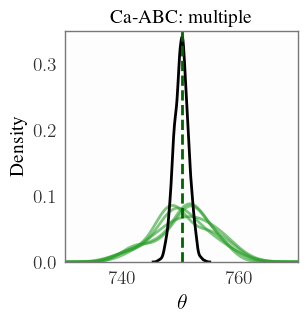

In [9]:
theta_true = 750
ind = 1 

if theta_true == 500:
    x_obs = np.load("x_obs_gamma_500.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_500.npy") # Loading true posterior samples
        
    xlim_start = 480
    xlim_end = 520
    ylim_end = 0.375
    
elif theta_true == 250:
    x_obs = np.load("x_obs_gamma_250.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_250.npy") # Loading true posterior samples
    
    xlim_start = 230 
    xlim_end = 270
    ylim_end = 0.575
    
elif theta_true == 750:
    x_obs = np.load("x_obs_gamma_750.npy") # Loading observed data
    true_pos_samples = np.load("true_posterior_gamma_750.npy") # Loading true posterior samples
        
    xlim_start = 730
    xlim_end = 770
    ylim_end = 0.35
    
samples0 = np.load("posterior_ca_abc_gamma_multiple_"+str(theta_true)+"_0.npy")
samples1 = np.load("posterior_ca_abc_gamma_multiple_"+str(theta_true)+"_1.npy")
samples2 = np.load("posterior_ca_abc_gamma_multiple_"+str(theta_true)+"_2.npy")
samples3 = np.load("posterior_ca_abc_gamma_multiple_"+str(theta_true)+"_3.npy")
samples4 = np.load("posterior_ca_abc_gamma_multiple_"+str(theta_true)+"_4.npy")

w0 = np.load("weights_ca_abc_gamma_multiple_"+str(theta_true)+"_0.npy")
w1 = np.load("weights_ca_abc_gamma_multiple_"+str(theta_true)+"_1.npy")
w2 = np.load("weights_ca_abc_gamma_multiple_"+str(theta_true)+"_2.npy")
w3 = np.load("weights_ca_abc_gamma_multiple_"+str(theta_true)+"_3.npy")
w4 = np.load("weights_ca_abc_gamma_multiple_"+str(theta_true)+"_4.npy")

from scipy.stats import gaussian_kde

kernel0 = gaussian_kde(samples0[:,0], weights=w0)
kernel1 = gaussian_kde(samples1[:,0], weights=w1)
kernel2 = gaussian_kde(samples2[:,0], weights=w2)
kernel3 = gaussian_kde(samples3[:,0], weights=w3)
kernel4 = gaussian_kde(samples4[:,0], weights=w4)

# Plotting
fig, axes = plt.subplots(1, figsize=(3, 3))

plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel0(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C2",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel1(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C2",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel2(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C2",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel3(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C2",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)
plt.plot(torch.linspace(xlim_start, xlim_end, 200), kernel4(torch.linspace(xlim_start, xlim_end, 200)) ,color = "C2",
         linewidth = 2,  linestyle = "solid", alpha = 0.6)

# sns.kdeplot(samples0[:,0], color = "C1", linewidth = 2, linestyle = "solid", label = "Ca-ABC", alpha = 0.6)
# sns.kdeplot(samples1[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
# sns.kdeplot(samples2[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
# sns.kdeplot(samples3[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
# sns.kdeplot(samples4[:,0], color = "C1", linewidth = 2, linestyle = "solid", alpha = 0.6)
sns.kdeplot(true_pos_samples[:,0], color = "black", linewidth = 2, linestyle = "solid", label = "True pos.")
axes.set_xlabel("$\\theta$", fontsize = 16)
axes.axvline(theta_true, color = "darkgreen", linestyle = "dashed")
plt.title("Ca-ABC: multiple")
# plt.ylim(0, 0.575)
plt.ylim(0, ylim_end)
plt.xlim(xlim_start, xlim_end)

plt.savefig('figures/plot_gamma_posteriors_ca_abc_mixture'+str(ind)+'_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

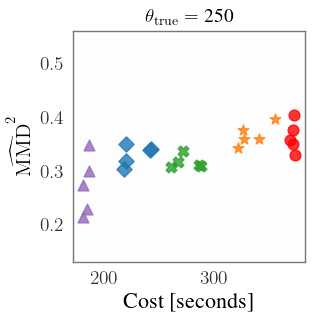

In [11]:
theta_true = 250

cost_standard_abc_gamma = np.load("cost_standard_abc_gamma_50000_"+str(theta_true)+".npy")
MMDvals_standard_abc = np.load("MMDvals_standard_abc_50000_"+str(theta_true)+".npy")

cost_ca_abc_gamma = np.load("cost_ca_abc_gamma50000_"+str(theta_true)+".npy")
MMDvals_cost_aware_abc = np.load("MMDvals_cost_aware_abc50000_"+str(theta_true)+".npy")

#cost_ca_abc_gamma_k3 = np.load("cost_ca_abc_gamma_k350000_"+str(theta_true)+".npy")
#MMDvals_cost_aware_abc_k3 = np.load("MMDvals_cost_aware_abc_k350000_"+str(theta_true)+".npy")

MMDvals_multiple_abc = np.load("MMDvals_cost_aware_multiple50000_"+str(theta_true)+".npy")
cost_multiple_gamma = np.load("cost_multiple_gamma50000_"+str(theta_true)+".npy")

point_marker = np.array(["o", '*', "^", "D", "X"]) 

plt.figure(figsize=(3, 3))

plt.scatter(cost_standard_abc_gamma, MMDvals_standard_abc, marker = point_marker[0], color = "red", s = 60, 
            alpha = 0.8, label = "$p$")
plt.scatter(cost_ca_abc_gamma[0,:], MMDvals_cost_aware_abc[0,:], marker = point_marker[1], color = "C1", s = 65, 
            alpha = 0.8, label = "$\\tilde{p}_g: g(z) = z$")
plt.scatter(cost_ca_abc_gamma[1,:], MMDvals_cost_aware_abc[1,:], marker = point_marker[3], color = "C0", s = 60, 
            alpha = 0.8, label = "$\\tilde{p}_g: g(z) = z^2$")
#plt.scatter(cost_ca_abc_gamma_k3, MMDvals_cost_aware_abc_k3, marker = point_marker[2], color = "C4", s = 60, 
 #           alpha = 0.8, label = "$\\tilde{p}_g: g(z) = z^3$")
plt.scatter(cost_ca_abc_gamma[2,:], MMDvals_cost_aware_abc[2,:], marker = point_marker[2], color = "C4", s = 60, 
             alpha = 0.8, label = "Ca-ABC: $g(z) = z^4$")
plt.scatter(cost_multiple_gamma, MMDvals_multiple_abc, marker = point_marker[4], color = "C2", s = 60, 
            alpha = 0.8, label = "$\\tilde{p}_g:$ multiple")
# plt.legend(fontsize = 11.5)
plt.title("$\\theta_{\mathrm{true}} = $ "+str(theta_true))
plt.xlabel('Cost [seconds]', fontsize = 16)
plt.ylim(0.13, 0.56)
plt.ylabel('$\widehat{\mathrm{MMD}}^2$', fontsize=15)
plt.savefig('figures/plot_gamma_abc_accuracy_vs_cost_'+str(theta_true)+'.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()